# IMPORT LIBRARY AND LOAD DATA

<b>catatat</b>
disini kita menggunakan VScode untuk Menjalankan code nya

In [ ]:
!pip install Sastrawi
!pip install nltk

In [ ]:
import nltk
import Sastrawi
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aden3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aden3\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
!pip install seaborn
!pip install sklearn
!pip install -U scikit-learn


  Using cached sklearn-0.0.post11.tar.gz (3.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2979 sha256=2f4455aa29860a03118a59fc7136072075a3efee8eb12df51cd5418634caa92c
  Stored in directory: c:\users\aden3\appdata\local\pip\cache\wheels\52\cc\47\500a56407c060a5d18bda9aa3ec2daf4721b8448ee4b268840
Successfully built sklearn


In [ ]:
import re
import string
import warnings

# Disable all warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
!pip install openpyxl


In [ ]:
data = pd.read_excel('C:\\aden belajar\\lomba gelarrasa\\data\\data_train.xlsx')
data.head(3)

,tweet,label
0,"suka banget kata2, ""kebenaran hanya menurut se...",positif
1,hanse mode anak rumahan gini tuh aku suka bang...,positif
2,"ya kali ngejar ngejar cinta, ngejar tahajjud a...",positif


In [ ]:
data.label.value_counts()

label
positif    1831
negatif    1618
netral     1600
Name: count, dtype: int64

# DATA PREPROCESSING

## casefolding
dalam tahap ini akan terjadi beberapa proses antara lain adalah:

*   Mengonversi teks menjadi huruf kecil
*   Menghapus teks diapit oleh tanda <>
*   Menghapus URL & shortlink
*   Menghapus username (handle Twitter)
*   Menghapus karakter non-alfabet
*   Menghapus tanda baca dan angka
*   Menghapus kata yang diulang-ulang dan diperpanjang






---





In [ ]:
def casefolding(text):
    # Mengonversi teks menjadi huruf kecil
    text = text.lower()
    # Menghapus teks diapit oleh tanda <>
    text = re.sub(r'<.*?>', '', text)
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus shortlink
    text = re.sub(r'\b(?:https?://|www\.)\S+\b', '', text)
    # Menghapus username (handle Twitter)
    text = re.sub(r'@[\w_]+', '', text)
    # Menghapus karakter non-alfabet
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghapus angka
    text = re.sub(r'\d+', '', text)
    # Menghapus kata yang berulang dan kata yang diperpanjang
    #contoh : ["hahaha","lariiii","tidaaa","mwehehe","wkwk"]
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    return text

## Tokenisasi
memecah kalimat menjadi kata perkata. hal ini dilakukan agar pada saat tahap *normalisasi* tidak terjadi masalah seperti kata yang seharusnya tidak ter-normalisasi menjadi ter-normalisasi.

In [ ]:
def tokenize_text(text):
    text = word_tokenize(text)
    return text

## Normalisasi
Merubah kata kata yang tidak baku/disingkat menjadi kata-kata yang lebih baku
sebagai contoh:
* km => kamu
* ydh => ya sudah


dll

In [ ]:
def csv_to_dict(csv_file, key_column, value_column): # disini kami membuat fungsi yang membuat dictionary dari file csv/excel
    df = pd.read_excel(csv_file)
    result_dict = dict(zip(df[key_column], df[value_column]))
    return result_dict

csv_file = 'C:\\aden belajar\\lomba gelarrasa\\data\\normalized_new.xlsx'  # lokasi file csv/excel yang berisikan kata-kata untuk normalisasi
key_column = 'keys'  # kolom yang akan dijadikan key pada dictionary (kolom ini berdasarkan pada kolom di file excel/csv)
value_column = 'values'  # kolom yang akan dijadikan value pada dictionary (kolom ini berdasarkan pada kolom di file excel/csv)

norm_dict = csv_to_dict(csv_file, key_column, value_column)
# norm_dict = {key: value for key, value in norm_dict.items()}


def normalize_tokens(tokens): # ini adalah fungsi yang akan melakukan normalisasi
    normalized_tokens = [norm_dict.get(token.lower(), token) for token in tokens]
    return normalized_tokens

## Stopwords
disini saya akan menghapus kata-kata yang dianggap tidak penting

In [ ]:
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('indonesian'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    return filtered_tokens

## Stemming

In [ ]:
def stem_tokens(tokens):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [ ]:
def text_preprocessing(text):
    text = casefolding(text)
    tokens = tokenize_text(text)
    tokens = normalize_tokens(tokens)
    tokens = remove_stopwords(tokens)
    tokens = stem_tokens(tokens)
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [ ]:
data['clean_text'] = data['tweet'].apply(text_preprocessing)

In [ ]:
data.head(10)

,tweet,label,clean_text
0,"suka banget kata2, ""kebenaran hanya menurut se...",positif,suka banget benar selera
1,hanse mode anak rumahan gini tuh aku suka bang...,positif,hanse mode anak rumah tuh suka banget wkwk pak...
2,"ya kali ngejar ngejar cinta, ngejar tahajjud a...",positif,ya kali kejar kejar cinta kejar tahajjud kadan...
3,selamat pagi sender! sana avail nih pas hari v...,positif,selamat pagi sender avail nih pas valentine sa...
4,sopaa!! cuz akuu suka banget jurusan tari di s...,positif,sopaa cuz akuu suka banget jurus tari ikut dai...
5,btw roo makasih rekomendasinyaa suka banget sa...,positif,ngomong ngomong roo terimakasih rekomendasinya...
6,awalnya mas firman suka masak ini karena suka ...,positif,mas firman suka masak suka nonton masterchef a...
7,heh crush sya ko lucu banget ya pengen jujur d...,positif,heh crush ko lucu banget ya jujur deh muhammad...
8,"ya udah, enggak apa. gue sama sahabat gue di s...",positif,ya sahabat sma suka laki bawa fun banget tuh l...
9,"iya bangett suka minderan, kalo nemenin temen ...",positif,iya bangett suka minder tani temen suka nya li...


## Melatih Model


In [ ]:
X = data['clean_text']
y=data['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.35, random_state=42,stratify=y)

In [ ]:
pipeline = Pipeline([
    ('prep',TfidfVectorizer(tokenizer=word_tokenize)),
    ('algo',RandomForestClassifier())
])

param = param = {
          'algo__max_depth':range(20,100),
          'algo__max_features': np.arange(0.3, 1.0, 0.01),
          'algo__min_samples_leaf': range(3,15),
          'algo__n_estimators': range(100,120),

}
model = RandomizedSearchCV(pipeline,param,n_iter=150, cv=5, verbose=1)
model.fit(X_train, y_train)

print("Best Parameters:", model.best_params_)
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best Parameters: {'algo__n_estimators': 112, 'algo__min_samples_leaf': 3, 'algo__max_features': 0.3, 'algo__max_depth': 51}
Train Accuracy: 0.8686376104846083
Test Accuracy: 0.7449095022624435


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     negatif       0.79      0.69      0.74       567
      netral       0.70      0.71      0.71       560
     positif       0.74      0.83      0.78       641

    accuracy                           0.74      1768
   macro avg       0.75      0.74      0.74      1768
weighted avg       0.75      0.74      0.74      1768



## implementasikan Model Pada file data_Titter_BayarPajak

In [ ]:
test = pd.read_excel('C:\\aden belajar\\lomba gelarrasa\\data\\Data_Twitter_BayarPajak.xlsx')
test.head()

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat Nov 11 08:34:39 +0000 2023,1723257921570734336,"@detikcom penggelapan dan kurang bayar"" pasti ...",0.0,0.0,0.0,1.0,in,2.033736e+08,1.723254e+18,Mrbeachbums,https://twitter.com/Mrbeachbums/status/1723257...
1,Sat Nov 11 04:52:45 +0000 2023,1723202075621028096,@P3ngendaliAir @detikcom Twitter ini termasuk ...,0.0,0.0,0.0,0.0,in,1.588568e+18,1.722928e+18,minimalmakximal,https://twitter.com/minimalmakximal/status/172...
2,Fri Nov 10 22:05:30 +0000 2023,1723099588880720128,@An4Julie @detikcom Yup betul sekali itu duit ...,1.0,1.0,0.0,2.0,in,4.855085e+08,1.722922e+18,EMON__Sumendap,https://twitter.com/EMON__Sumendap/status/1723...
3,Wed Nov 08 09:15:22 +0000 2023,1722181003794632704,@JHN13_Faris @detikcom Nah ini. 8 triliun. Ma...,0.0,0.0,0.0,0.0,in,9.175866e+07,1.722175e+18,rizahariati,https://twitter.com/rizahariati/status/1722181...
4,Tue Nov 07 21:08:50 +0000 2023,1721998164302164480,@detikcom Rakyat Amerika bayar pajak bukannya ...,0.0,0.0,0.0,2.0,in,8.880291e+17,1.721832e+18,Ivonedarm,https://twitter.com/Ivonedarm/status/172199816...


In [ ]:
data_test = test[['full_text']]

In [ ]:
data_test['clean_text'] = data_test['full_text'].apply(text_preprocessing)

In [ ]:
data_test

,full_text,clean_text
0,"@detikcom penggelapan dan kurang bayar"" pasti ...",gelap bayar konsekwensinya beda ngadiman conto...
1,@P3ngendaliAir @detikcom Twitter ini termasuk ...,twitter usaha amerika bayar pajak dana nya pak...
2,@An4Julie @detikcom Yup betul sekali itu duit ...,yup duit hak ngelakuin uang komentar tau konte...
3,@JHN13_Faris @detikcom Nah ini. 8 triliun. Ma...,triliun iya duit uap kejar bayar pajak jual la...
4,@detikcom Rakyat Amerika bayar pajak bukannya ...,rakyat amerika bayar pajak pakai sejahtera rak...
...,...,...
678,"@detikcom hanya berburu wajib pajak, bukan men...",buru wajib pajak cipta wajib pajak
679,@detikcom klo stnk n no pol setuju seumur hidu...,kalo stnk n nomor pol tuju umur hidup kalo sim...
680,@detikcom Kenapa harus hernopol ya? biaya hern...,hernopol ya biaya hernopol beban wajib pajak a...
681,@detikcom Termasuk pajak motor itu wajib balik...,pajak motor wajib nama beli pajak tahun


In [ ]:
model.predict(data_test['clean_text'])

array(['netral', 'netral', 'netral', 'positif', 'netral', 'netral',
       'netral', 'netral', 'netral', 'positif', 'netral', 'netral',
       'netral', 'netral', 'netral', 'netral', 'netral', 'netral',
       'netral', 'netral', 'netral', 'netral', 'netral', 'netral',
       'netral', 'netral', 'netral', 'netral', 'netral', 'netral',
       'netral', 'netral', 'netral', 'netral', 'netral', 'negatif',
       'netral', 'netral', 'netral', 'negatif', 'netral', 'negatif',
       'netral', 'netral', 'netral', 'positif', 'netral', 'netral',
       'netral', 'netral', 'netral', 'netral', 'netral', 'netral',
       'netral', 'netral', 'netral', 'netral', 'netral', 'netral',
       'netral', 'positif', 'netral', 'netral', 'negatif', 'netral',
       'netral', 'positif', 'netral', 'negatif', 'netral', 'netral',
       'negatif', 'netral', 'netral', 'netral', 'netral', 'netral',
       'netral', 'netral', 'netral', 'netral', 'netral', 'netral',
       'negatif', 'netral', 'netral', 'netral', 'ne

In [ ]:
data_test['predict'] = model.predict(data_test['clean_text'])



In [ ]:
data_test

,full_text,clean_text,predict
0,"@detikcom penggelapan dan kurang bayar"" pasti ...",gelap bayar konsekwensinya beda ngadiman conto...,netral
1,@P3ngendaliAir @detikcom Twitter ini termasuk ...,twitter usaha amerika bayar pajak dana nya pak...,netral
2,@An4Julie @detikcom Yup betul sekali itu duit ...,yup duit hak ngelakuin uang komentar tau konte...,netral
3,@JHN13_Faris @detikcom Nah ini. 8 triliun. Ma...,triliun iya duit uap kejar bayar pajak jual la...,positif
4,@detikcom Rakyat Amerika bayar pajak bukannya ...,rakyat amerika bayar pajak pakai sejahtera rak...,netral
...,...,...,...
678,"@detikcom hanya berburu wajib pajak, bukan men...",buru wajib pajak cipta wajib pajak,netral
679,@detikcom klo stnk n no pol setuju seumur hidu...,kalo stnk n nomor pol tuju umur hidup kalo sim...,netral
680,@detikcom Kenapa harus hernopol ya? biaya hern...,hernopol ya biaya hernopol beban wajib pajak a...,netral
681,@detikcom Termasuk pajak motor itu wajib balik...,pajak motor wajib nama beli pajak tahun,netral


## Visualisasi data

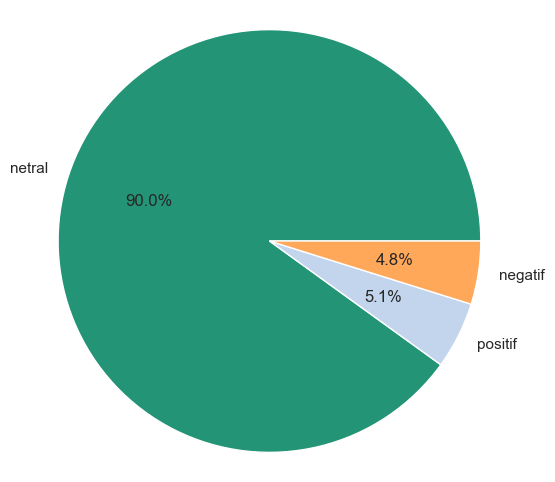

In [ ]:
proporsi = data_test['predict'].value_counts(normalize=True)

plt.figure(figsize=(6, 6))
plt.pie(proporsi, labels=proporsi.index, autopct='%1.1f%%', colors=['#239476', '#C2D5EC', '#FFA85A'])
plt.axis('equal')
plt.show()